# Mobile Money Transactions Fraud Analysis

This notebook analyzes a dataset of mobile money transactions to identify patterns and occurrences of fraudulent activities. The dataset contains five types of transactions: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER. The aim is to essentially analyze the distribution of these transactions, identify fraud-prone types, and evaluate the effectiveness of the fraud detection system.


In [127]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# Loading the dataset from a CSV file
df = pd.read_csv("C:\\Users\\Kevin\\Downloads\\Chase\\transactions.csv")

In [129]:
# Displaying the first few rows of the dataset to understand its structure
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


### Data Overview
The dataset contains 200,000 rows and 11 columns. Here is a quick overview of the key columns:
- `step`: Time step unit of the transaction (1 hour).
- `type`: The type of transaction, which can be CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.
- `amount`: The amount of money transacted.
- `nameOrig`: The ID of the customer initiating the transaction.
- `oldbalanceOrg`: Initial balance of the customer before the transaction.
- `newbalanceOrig`: New balance of the customer after the transaction.
- `nameDest`: The ID of the customer receiving the transaction.
- `oldbalanceDest`: Initial balance of the receiver before the transaction.
- `newbalanceDest`: New balance of the receiver after the transaction.
- `isFraud`: 1 if the transaction is fraudulent, 0 otherwise.
- `isFlaggedFraud`: 1 if the transaction is flagged as fraudulent by the system, 0 otherwise.

In [130]:
# Checking the shape of the dataset to understand the number of rows and columns
print(df.shape)

(200000, 11)


In [131]:
# Generating descriptive statistics of the dataset to get an overview of data distribution
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  200000.00000  2.000000e+05   2.000000e+05    2.000000e+05   
mean       10.06589  1.808112e+05   8.821957e+05    9.001938e+05   
std         2.12174  3.291800e+05   2.766264e+06    2.803759e+06   
min         1.00000  3.200000e-01   0.000000e+00    0.000000e+00   
25%         9.00000  1.201612e+04   0.000000e+00    0.000000e+00   
50%        10.00000  6.872104e+04   1.951000e+04    0.000000e+00   
75%        12.00000  2.290791e+05   1.915686e+05    2.275212e+05   
max        13.00000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    2.000000e+05    2.000000e+05  200000.000000        200000.0  
mean     9.411592e+05    1.191866e+06       0.000735             0.0  
std      2.373010e+06    2.655236e+06       0.027101             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00    0.00000

### Dataset Statistics
The dataset has 200,000 transactions and 11 columns. Descriptive statistics provide insights into the data distribution. For example:
- The average transaction amount is around 179,861.90.
- The maximum transaction amount is 9.2 million, indicating a wide range of transaction values.
- The majority of transactions have zero balances for `oldbalanceDest` and `newbalanceDest`, suggesting that many transactions may not involve actual account holders.

In [132]:
transaction_counts = df['type'].value_counts()
print(transaction_counts)

type
PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: count, dtype: int64


### Fraudulent Transactions Analysis
We filter the dataset to identify all transactions that were marked as fraud (`isFraud = 1`). This helps in understanding which transaction types are more susceptible to fraud.

In [133]:
# Filtering the dataset to show only fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]
print(fraud_transactions)

        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
182862    13  CASH_OUT      408.00  C1894004688         408.00   
193765    13  TRANSFER    48375.02   C920803432       48375.02   
193766    13  CASH_OUT    48375.02  C1894578299       48375.02   
196775    13  TRANSFER  4022667.54   C735463888     4022667.54   
196776    13  CASH_OUT  4022667.54    C79951219     4022667.54   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00        1   
3                  0.0    C38997010        2118

### Transaction Type Distribution
The following plot shows the distribution of different transaction types in the dataset. This helps in understanding which types are most common.

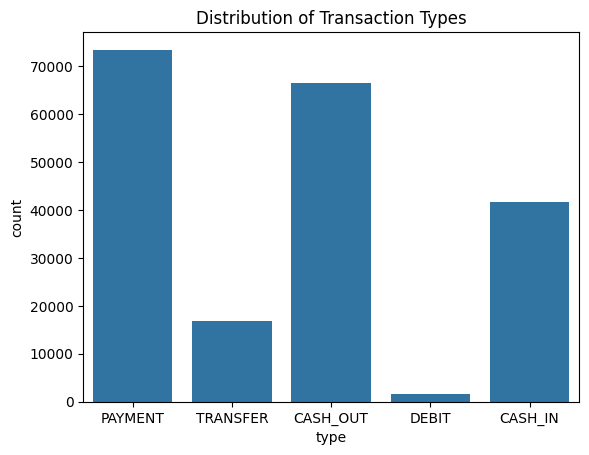

In [134]:
# Visualizing the count of each transaction type
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.show()

### Insights
The plot shows that `PAYMENT` transactions are the most frequent, followed by `CASH_OUT` and `CASH_IN`. `DEBIT` transactions are relatively rare, which might indicate that they are not commonly used in this system.

### Transaction Types Differentiated by Fraud Status

We will visualize the number of transactions for each type, differentiated by whether they are fraudulent (`isFraud = 1`) or not (`isFraud = 0`). This count plot provides a clear view of which transaction types are more prone to fraud. If some transaction types do not have fraudulent transactions, we will annotate them to reflect this.

       type  isFraud  count
0   CASH_IN        0  41579
1  CASH_OUT        0  66413
2  CASH_OUT        1     75
3     DEBIT        0   1670
4   PAYMENT        0  73427
5  TRANSFER        0  16764
6  TRANSFER        1     72


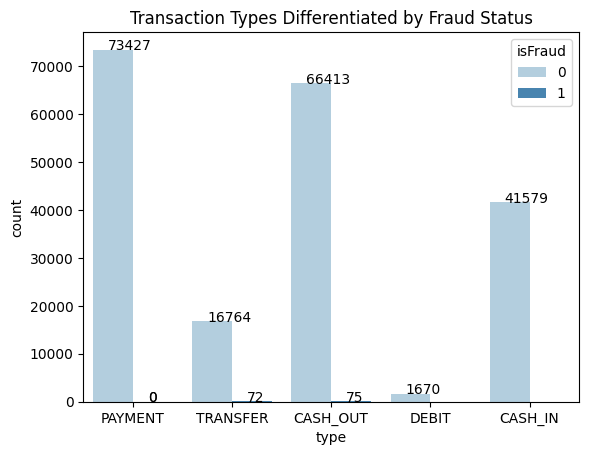

In [135]:
import pandas as pd

# Count the number of transactions per type and fraud status
fraud_counts = df.groupby(['type', 'isFraud']).size().reset_index(name='count')

# Print the fraud counts for transparency
print(fraud_counts)

# Create the count plot with custom palette
sns.countplot(x='type', hue='isFraud', data=df, palette='Blues')

# Annotate the bars with their respective counts
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + 0.15, p.get_height() + 10))

# Display the plot
plt.title('Transaction Types Differentiated by Fraud Status')
plt.show()

### Insights

- The plot shows that most fraudulent transactions are concentrated in specific types like `TRANSFER` and `CASH_OUT`.
- Some transaction types, such as `CASH-IN` and `PAYMENT`, have no fraudulent transactions in this dataset, as indicated by annotations on the plot.
- This visualization helps us focus on the most critical transaction types for fraud detection.

### Correlation Analysis

To better understand the relationships between the key numeric features in the dataset, we calculate the correlation matrix for a subset of features. By focusing on the most relevant features such as transaction amounts, balances, and fraud occurrence, we aim to highlight the important correlations while keeping the visualization clear and interpretable.

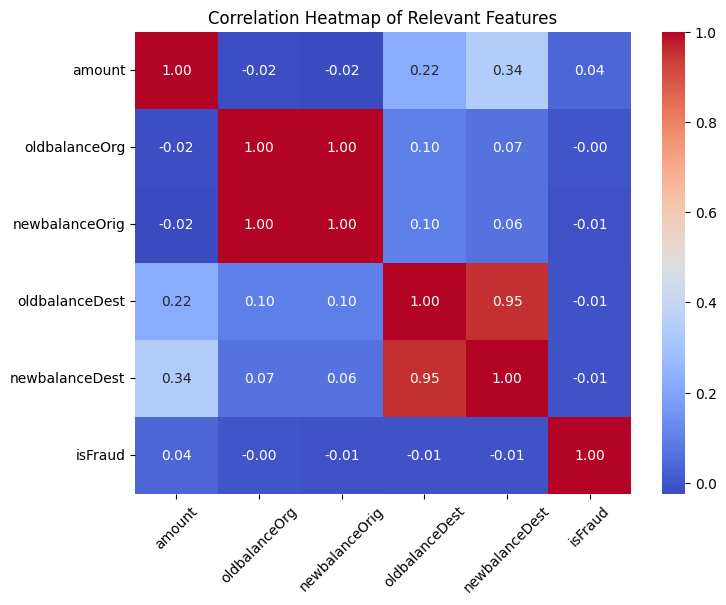

In [136]:
# Selecting a subset of numeric columns relevant to fraud detection for a clearer heatmap
relevant_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

# Calculating the correlation matrix of the selected features
correlation_subset = df[relevant_features].corr()

# Plotting the correlation heatmap with rotated axis labels for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Relevant Features')
plt.xticks(rotation=45)  # Rotating x-axis labels
plt.yticks(rotation=0)   # Keeping y-axis labels horizontal
plt.show()

### Insights from the Correlation Heatmap

- `oldbalanceDest` and `newbalanceDest` have a high positive correlation (0.95), as expected, since they represent the balance before and after transactions for the destination account.
- `oldbalanceOrg` and `newbalanceOrig` also have a perfect positive correlation (1.0), which is logical for similar reasons.
- `amount` shows a moderate correlation with `newbalanceDest` (0.34), suggesting that transaction amounts significantly impact the destination balance.
- `isFraud` has very low correlation with other features, reinforcing that detecting fraud may require more sophisticated techniques beyond simple linear relationships.

### Fraud Rate by Transaction Type
We calculate the fraud rate for each type of transaction to identify which types have a higher likelihood of fraud. The plot below shows the fraud rates.

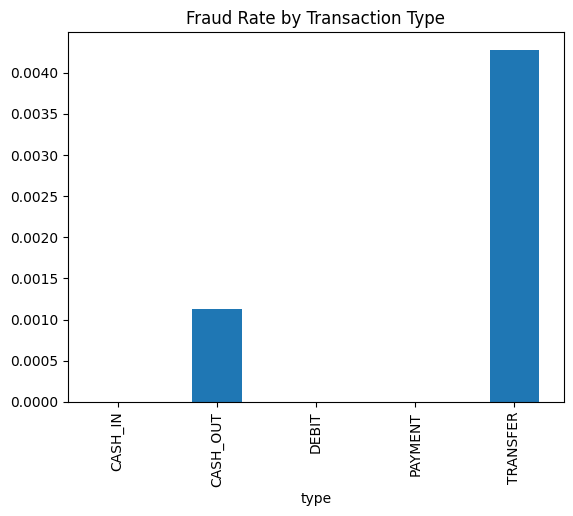

In [137]:
# Calculating the fraud rate for each transaction type
fraud_rate_by_type = df.groupby('type')['isFraud'].mean()

# Plotting the fraud rate by transaction type to visualize which types have the highest rates of fraud
fraud_rate_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type')
plt.show()

### Insights
`TRANSFER` and `CASH_OUT` transactions have the highest fraud rates. This suggests that these transaction types are more frequently targeted by fraudulent activities.

### Flagged vs Actual Fraud
The heatmap below compares transactions that were flagged as fraud by the system against the ones that were actually fraudulent. This helps assess the effectiveness of the fraud detection system.

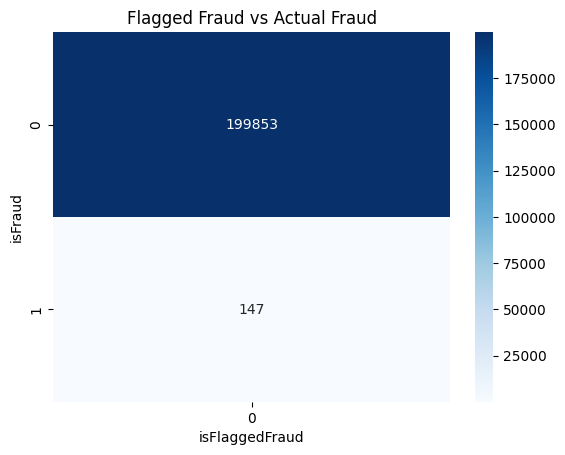

In [138]:
# Creating a heatmap to compare flagged fraud vs actual fraud
flagged_vs_actual = pd.crosstab(df['isFraud'], df['isFlaggedFraud'])
sns.heatmap(flagged_vs_actual, annot=True, cmap='Blues', fmt='d')
plt.title('Flagged Fraud vs Actual Fraud')
plt.show()

### Conclusion
The current fraud detection system flags very few transactions as fraudulent, and there is a noticeable discrepancy between flagged fraud and actual fraud. This suggests room for improvement in the detection algorithm. 
- `TRANSFER` and `CASH_OUT` transactions are the most prone to fraud in this dataset.
- The fraud detection system currently has a low rate of flagging fraud, indicating it may need improvements.
- Future work could involve creating a machine learning model to better detect fraudulent transactions and reduce false negatives.